In [8]:
from cuda_check import get_cuda

device = get_cuda()
print("\nDevice: ", device)

__CUDNN VERSION: 8500
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA GeForce RTX 2080 SUPER
__CUDA Device Total Memory [GB]: 8.58947584
total_memory -> 7.99957275390625 GB
memory_reserved -> 0.0 GB
memory_allocated -> 0.0 GB
free reserved -> 0.0 GB

Device:  cuda


In [ ]:
import torch.nn
from torchinfo import summary 

In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Custom imports
from package_name.images_module import (
    display_images,
    analysis_of_image_sizes
)
from package_name.models import VisionTransformer

import os


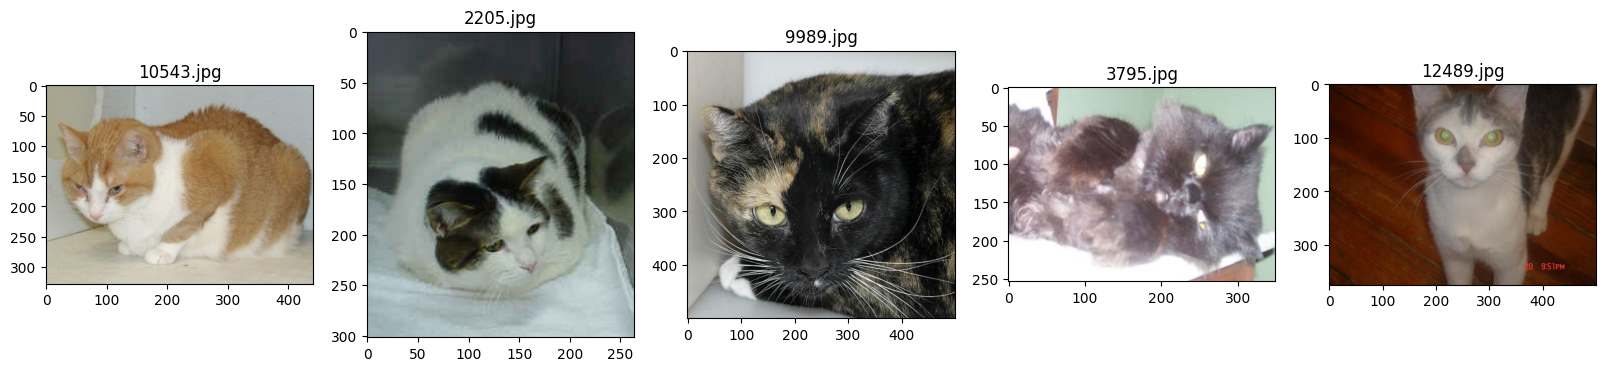

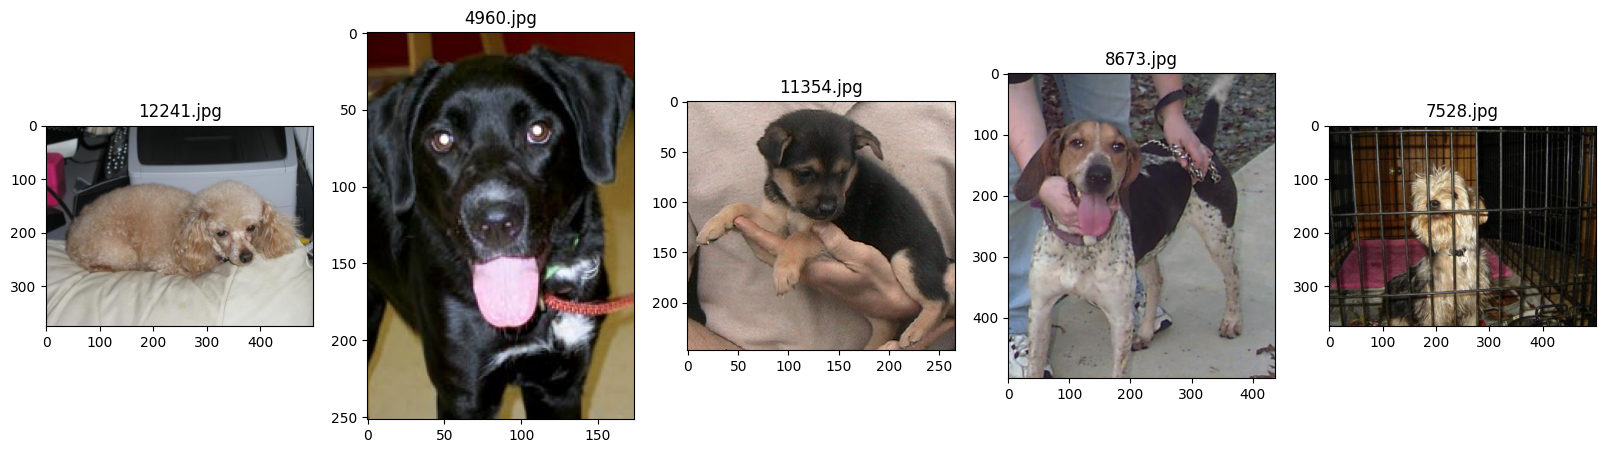

In [4]:
path = r"C:\Users\kpl_b\Desktop\Datasets\cats and dogs"

cats_path = os.path.join(path, "Cat")
dogs_path = os.path.join(path, "Dog")

display_images(cats_path)
display_images(dogs_path)

In [5]:
analysis_output = analysis_of_image_sizes(cats_path)

df = pd.DataFrame(dict(analysis_output), index=[0]).T
df = df.sort_values(0,  ascending=False)
print(df)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12499/12499 [00:02<00:00, 5019.10it/s]

            0
500 375  3208
375 500   229
500 333   225
320 240   212
500 374   105
...       ...
188 281     1
480 324     1
318 303     1
489 477     1
392 420     1

[4105 rows x 1 columns]


In [10]:
output = model(input_image)

torch.Size([1, 3, 200, 200])
1
patch_embedding:  torch.Size([1, 144, 512])
torch.Size([1, 1, 512])
torch cat:  torch.Size([1, 145, 512])


RuntimeError: The size of tensor a (145) must match the size of tensor b (144) at non-singleton dimension 1

In [ ]:
model = ViT()

In [41]:
summary(model=ViT())

Layer (type:depth-idx)                                            Param #
ViT                                                               152,064
├─PatchEmbedding: 1-1                                             --
│    └─Conv2d: 2-1                                                590,592
│    └─Flatten: 2-2                                               --
├─Dropout: 1-2                                                    --
├─TransformerEncoder: 1-3                                         --
│    └─ModuleList: 2-3                                            --
│    │    └─TransformerEncoderLayer: 3-1                          7,087,872
│    │    └─TransformerEncoderLayer: 3-2                          7,087,872
│    │    └─TransformerEncoderLayer: 3-3                          7,087,872
│    │    └─TransformerEncoderLayer: 3-4                          7,087,872
│    │    └─TransformerEncoderLayer: 3-5                          7,087,872
│    │    └─TransformerEncoderLayer: 3-6             

In [ ]:
demo_img = torch.randn(1, 3, 224, 224).to(device)
print(demo_img.shape) 

In [ ]:
# Create ViT
vit = ViT().to(device)
vit(demo_img)

In [ ]:
# %%writefile vit.py
!python vit.py

In [26]:
from vit import ViT

In [28]:
demo_img = torch.randn(1, 3, 500, 500)

In [65]:
from torchvision import transforms
# Create image size (from Table 3 in the ViT paper) 
IMG_SIZE = 224

transforms_sequential = torch.nn.Sequential(
    transforms.Resize((IMG_SIZE, IMG_SIZE))
)
scripted_transforms = torch.jit.script(transforms_sequential)
print(f"Manually created transforms: {scripted_transforms}")

Manually created transforms: RecursiveScriptModule(
  original_name=Sequential
  (0): RecursiveScriptModule(original_name=Resize)
)


In [76]:
ndarray_image = np.random.rand(3,500,500)
# Convert the ndarray to a PyTorch tensor
tensor = torch.tensor(ndarray_image)
output_tensor = scripted_transforms(tensor)

C:\Users\kpl_b\Desktop\Code Projects\vision-transformers-cats-and-dogs\venv\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [77]:
print(tensor.shape)
print(output_tensor.shape)

torch.Size([3, 500, 500])
torch.Size([3, 224, 224])


In [ ]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names